## Load Packages

In [25]:
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation

from sklearn.linear_model import RidgeCV, LassoCV


import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Dataset

In [3]:
df = pd.read_csv("./winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory Analysis 

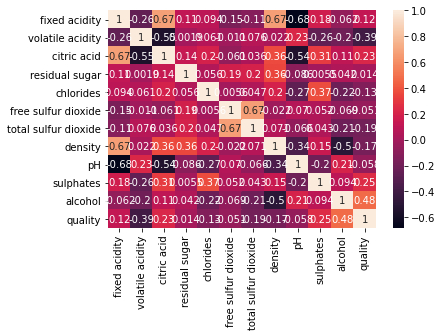

In [4]:
# corr matrix 
corrMatrix = df.corr()

# visual corr matrix 
sn.heatmap(corrMatrix, annot=True)
plt.show()

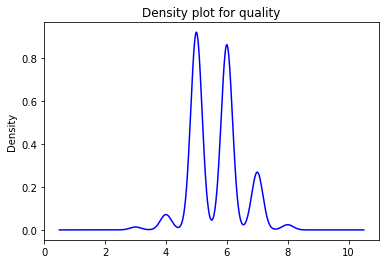

In [5]:
# Density plot for dependent variable "quality"
df.quality.plot.density(color='blue')
plt.title('Density plot for quality')
plt.show()

# seemingly normal distribution 

<AxesSubplot:title={'center':'fixed acidity'}, xlabel='quality'>

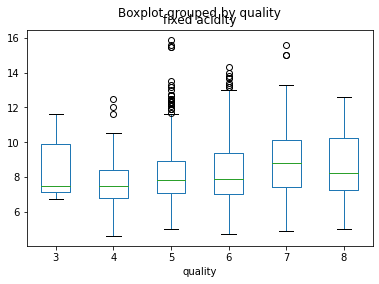

In [44]:
# box plots against quality 

df.boxplot(by ='quality', column =['fixed acidity'], grid = False)

<AxesSubplot:title={'center':'residual sugar'}, xlabel='quality'>

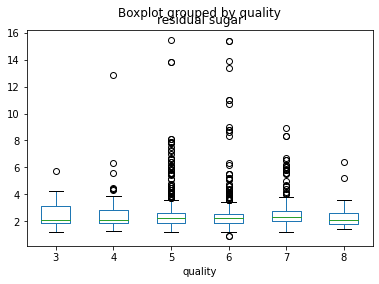

In [45]:
df.boxplot(by ='quality', column =['residual sugar'], grid = False)

## Linear Regression w TTS

In [14]:
# in KF

predictors = ['fixed acidity', 'volatile acidity','citric acid', 'residual sugar','chlorides',
             'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

y = df["quality"]


X_train, X_test, y_train, y_test = train_test_split(df[predictors],y, test_size = 0.2)

In [15]:
# create and fit
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# predictions
y_pred = model.predict(X_test)

R2 model eval:

test > train = overfit 

In [41]:
#training R2
print("R2 TRAIN:", model.score(X_train, y_train))

#testing R2
print("R2 TEST:", model.score(X_test, y_test))

R2 TRAIN: 0.3334752104044796
R2 TEST: 0.45605730641332864


In [42]:
# mse and mae

print("MSE:", mean_squared_error(y_test,y_pred ))
print("MAE:", mean_absolute_error(y_test,y_pred ))

MSE: 0.3636766852902137
MAE: 0.45705023871063766


In [23]:
# true vs. pred
true_vs_pred = pd.DataFrame({"predicted": y_pred, 
                            "true": y_test})

true_vs_pred

,predicted,true
441,6.161311,6
303,4.968524,5
460,5.967843,6
783,5.333506,5
1433,5.758418,7
...,...,...
710,4.926281,5
335,6.125196,7
871,5.599303,5
190,5.138523,5


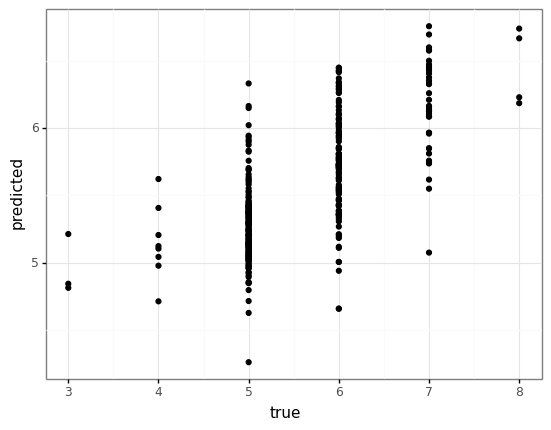

<ggplot: (8791258647646)>

In [20]:
ggplot(true_vs_pred, aes(x='true', y='predicted')) + geom_point() + theme_bw()

In [43]:
# coef df
coefficients = pd.DataFrame({"Coef": model.coef_,
                            "Name": predictors})

coefficients

,Coef,Name
0,0.008353,fixed acidity
1,-1.132779,volatile acidity
2,-0.232253,citric acid
3,0.008127,residual sugar
4,-1.554579,chlorides
5,0.004395,free sulfur dioxide
6,-0.003170,total sulfur dioxide
7,5.193350,density
8,-0.451061,pH
9,0.734759,sulphates


coef plot

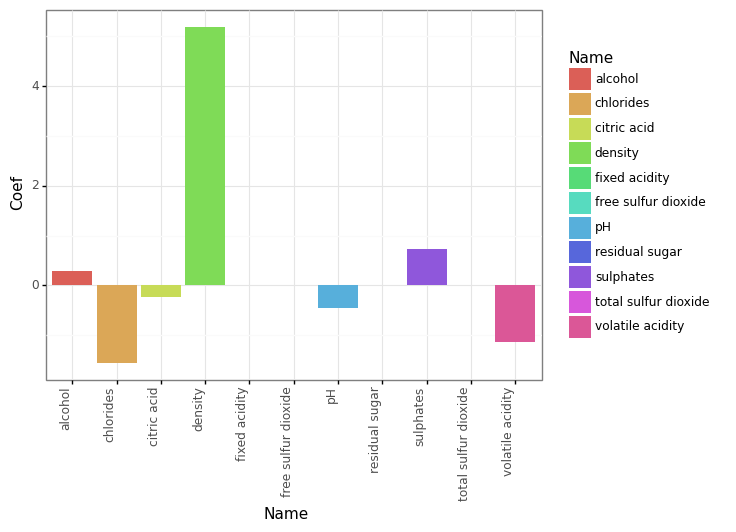

<ggplot: (8791265734750)>

In [44]:
# coef plot
(ggplot(coefficients, aes(x = "Name", y = "Coef", fill = "Name" )) + theme_bw() + geom_bar(stat = "identity")) + theme(axis_text_x  = element_text(angle = 90, hjust = 1))

## LASSO & Ridge Regression

LASSO:

model is slightly underfit given that test is < than train. 

In [32]:
#lsr_tune = LassoCV(cv = 5).fit(X_train,y_train)
lsr_tune = LassoCV(cv = 5, alphas = [0.001,0.01,0.05,1]).fit(X_train,y_train)

print("TRAIN: ", mean_absolute_error(y_train, lsr_tune.predict(X_train)))
print("TEST : ", mean_absolute_error(y_test, lsr_tune.predict(X_test)))

print("\nChose " + str(lsr_tune.alpha_) + " as our alpha.")

TRAIN:  0.5143777334798783
TEST :  0.45941816422934423

Chose 0.001 as our alpha.


RIDGE:

model is slightly underfit given that test is < than train. 

In [33]:
#rr_tune = RidgeCV(cv = 5).fit(X_train,y_train)
rr_tune = RidgeCV(cv = 5, alphas = [0.001,0.01,0.05,1]).fit(X_train,y_train)

print("TRAIN: ", mean_absolute_error(y_train, rr_tune.predict(X_train)))
print("TEST : ", mean_absolute_error(y_test, rr_tune.predict(X_test)))

print("\nChose " + str(rr_tune.alpha_) + " as our alpha.")

TRAIN:  0.5135077044010462
TEST :  0.45654385677030795

Chose 0.05 as our alpha.
